# NPB_Team_Batting_Stats_Analysis


Google Driveへのマウント

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


データの読み込みとクレンジング

In [88]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語表示用（Colabで実行する場合）
!pip install japanize-matplotlib
import japanize_matplotlib

# データの読み込みとクレンジング
def load_and_clean_data(file_path):
    data = []
    current_year = None
    current_league = None

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    for line in lines:
        line = line.strip()
        if not line or line.startswith("URL:"):
            # URLから年度とリーグを抽出
            year_match = re.search(r'/(\d{4})/', line)
            league_match = re.search(r'tmb_([cp])\.html', line)
            if year_match: current_year = int(year_match.group(1))
            if league_match: current_league = "セ・リーグ" if league_match.group(1) == 'c' else "パ・リーグ"
            continue

        if line.startswith("チーム,"):
            header = line.split(',')
            continue

        cols = line.split(',')
        if len(cols) == len(header):
            row = {'年度': current_year, 'リーグ': current_league}
            for h, val in zip(header, cols):
                try:
                    row[h] = float(val) if '.' in val else int(val)
                except ValueError:
                    row[h] = val
            data.append(row)

    return pd.DataFrame(data)

# ファイルを読み込む（アップロードしたファイル名を指定）
df = load_and_clean_data('/content/drive/MyDrive/Colab Notebooks/NPB_Team_Batting_Stats_Analysis/scraped_baseball_stats.csv')
df.head()

,年度,リーグ,チーム,打率,試合,打席,打数,得点,安打,二塁打,...,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打,長打率,出塁率
0,2015,セ・リーグ,ヤクルト,0.257,143,5423,4817,574,1240,223,...,29,104,31,433,4,37,909,96,0.377,0.322
1,2015,セ・リーグ,中日,0.253,143,5414,4835,473,1222,188,...,33,114,27,401,10,36,1000,83,0.344,0.313
2,2015,セ・リーグ,DeNA,0.249,143,5328,4763,508,1186,219,...,36,137,24,361,7,43,1047,77,0.373,0.306
3,2015,セ・リーグ,阪神,0.247,143,5373,4705,465,1160,192,...,38,138,28,464,9,38,1001,93,0.343,0.317
4,2015,セ・リーグ,広島,0.246,143,5386,4752,506,1170,201,...,50,135,29,441,12,29,1082,87,0.368,0.312


2015年度から2025年度までのセ・リーグとパ・リーグそれぞれの年間平均成績

In [89]:
grouped_stats = df.groupby(['年度', 'リーグ']).mean(numeric_only=True)
print(grouped_stats)

                  打率     試合           打席           打数          得点  \
年度   リーグ                                                            
2015 セ・リーグ  0.249167  143.0  5371.333333  4757.333333  502.500000   
     パ・リーグ  0.255833  143.0  5448.333333  4790.166667  573.333333   
2016 セ・リーグ  0.253000  143.0  5436.166667  4829.833333  562.500000   
     パ・リーグ  0.259500  143.0  5486.333333  4797.166667  583.500000   
2017 セ・リーグ  0.250667  143.0  5427.000000  4808.000000  569.666667   
     パ・リーグ  0.250500  143.0  5393.500000  4752.000000  573.333333   
2018 セ・リーグ  0.258833  143.0  5509.833333  4850.000000  625.166667   
     パ・リーグ  0.253667  143.0  5452.000000  4807.500000  609.666667   
2019 セ・リーグ  0.252500  143.0  5467.166667  4824.833333  601.166667   
     パ・リーグ  0.251500  143.0  5465.333333  4796.666667  616.333333   
2020 セ・リーグ  0.253833  120.0  4515.500000  4000.500000  493.666667   
     パ・リーグ  0.246000  120.0  4513.333333  3926.666667  493.833333   
2021 セ・リーグ  0.250333  143.0  5279.

2015年度から2025年度までのセ・リーグとパ・リーグそれぞれの本塁打数の年度別推移を比較するグラフ


In [90]:
home_runs_by_year_league = grouped_stats[['本塁打']].reset_index()
print(home_runs_by_year_league.head())

     年度    リーグ         本塁打
0  2015  セ・リーグ   95.166667
1  2015  パ・リーグ  107.833333
2  2016  セ・リーグ  118.833333
3  2016  パ・リーグ  104.666667
4  2017  セ・リーグ  119.666667


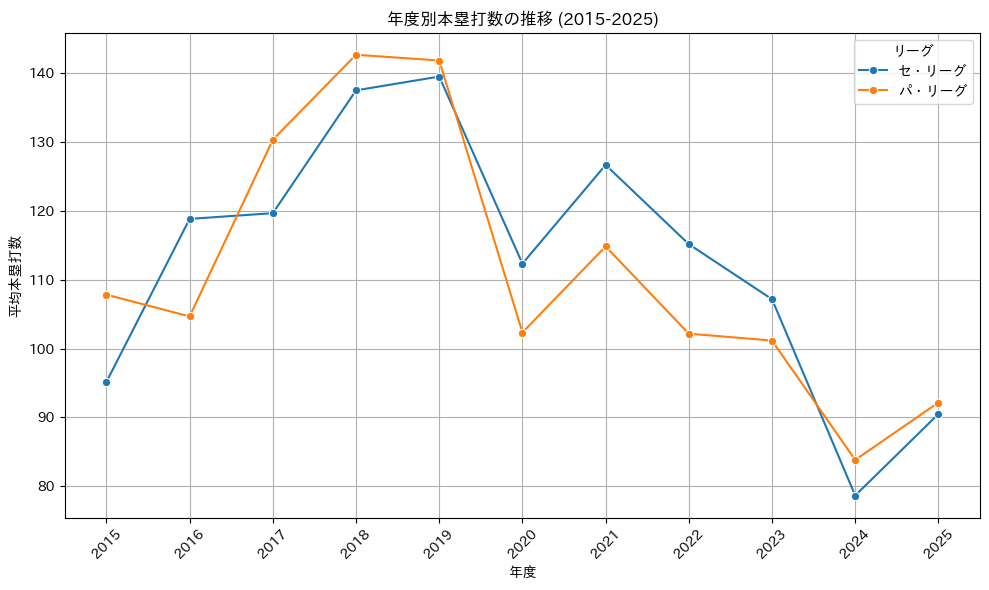

In [91]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=home_runs_by_year_league, x='年度', y='本塁打', hue='リーグ', marker='o')
plt.title('年度別本塁打数の推移 (2015-2025)')
plt.xlabel('年度')
plt.ylabel('平均本塁打数')
plt.grid(True)
plt.legend(title='リーグ')
plt.xticks(home_runs_by_year_league['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

巨人の本塁打数


In [92]:
G_df = df[df['チーム'].isin(['巨人'])]
G_home_runs_by_year = G_df[['年度', '本塁打']]
display(G_home_runs_by_year)

,年度,本塁打
5,2015,98
8,2016,128
14,2017,113
21,2018,152
25,2019,183
32,2020,135
40,2021,169
47,2022,163
48,2023,164
55,2024,81


巨人の年度別本塁打数の推移

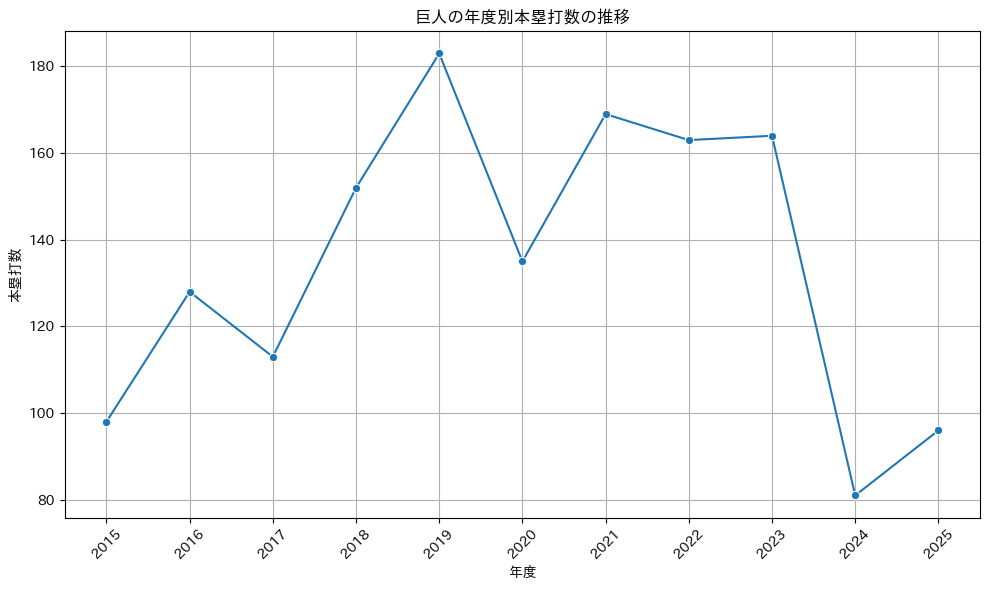

In [93]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=G_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('巨人の年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(G_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

阪神の本塁打数


In [94]:
T_df = df[df['チーム'].isin(['阪神'])]
T_home_runs_by_year = T_df[['年度', '本塁打']]
display(T_home_runs_by_year)

,年度,本塁打
3,2015,78
11,2016,90
15,2017,113
22,2018,85
27,2019,94
34,2020,110
39,2021,121
46,2022,84
50,2023,84
58,2024,67


阪神の年度別本塁打数の推移

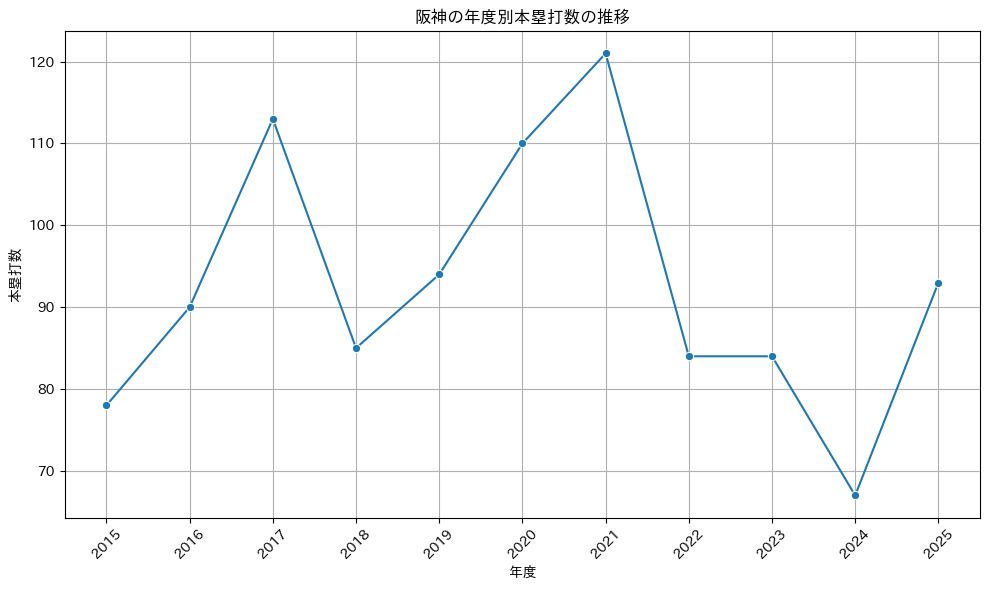

In [95]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=T_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('阪神の年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(T_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

ヤクルトの本塁打数


In [96]:
S_df = df[df['チーム'].isin(['ヤクルト'])]
S_home_runs_by_year = S_df[['年度', '本塁打']]
display(S_home_runs_by_year)

,年度,本塁打
0,2015,107
7,2016,113
17,2017,95
18,2018,135
29,2019,167
35,2020,114
38,2021,142
44,2022,174
52,2023,123
57,2024,103


ヤクルトの年度別本塁打数の推移

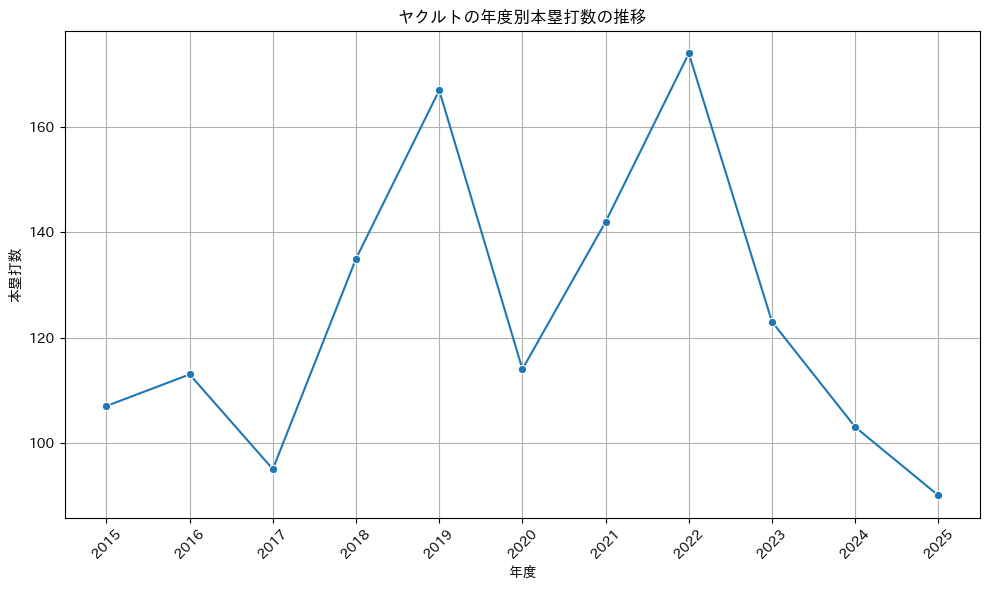

In [97]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=S_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('ヤクルトの年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(S_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()


中日の本塁打数

In [98]:
D_df = df[df['チーム'].isin(['中日'])]
D_home_runs_by_year = D_df[['年度', '本塁打']]
display(D_home_runs_by_year)

,年度,本塁打
1,2015,71
10,2016,89
16,2017,111
19,2018,97
24,2019,90
33,2020,70
41,2021,69
45,2022,62
53,2023,71
56,2024,68


中日の年度別本塁打数の推移



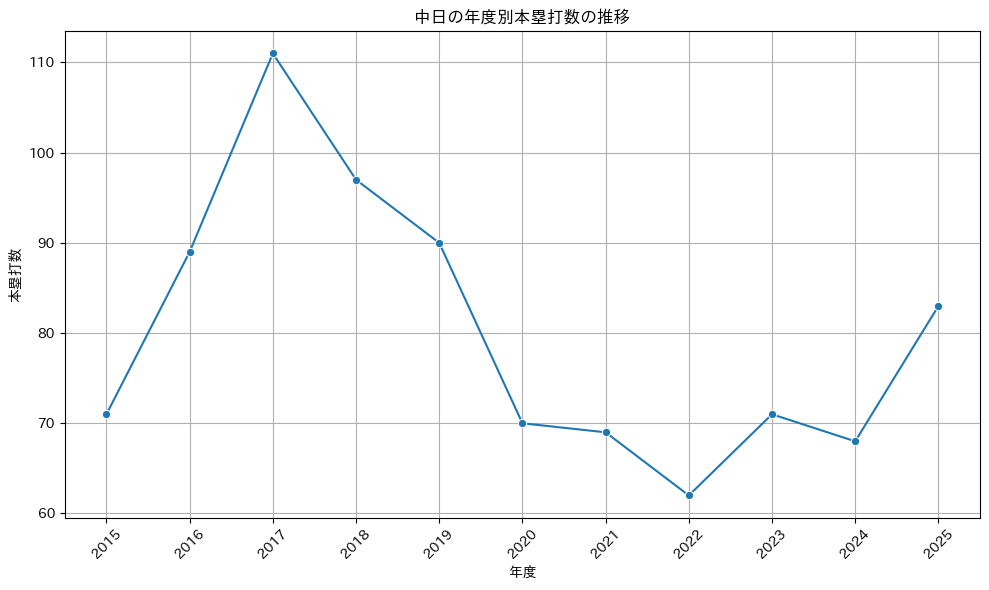

In [99]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=D_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('中日の年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(D_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

広島の本塁打数

In [100]:
C_df = df[df['チーム'].isin(['広島'])]
C_home_runs_by_year = C_df[['年度', '本塁打']]
display(C_home_runs_by_year)

,年度,本塁打
4,2015,105
6,2016,153
12,2017,152
20,2018,175
26,2019,140
31,2020,110
36,2021,123
42,2022,91
51,2023,96
59,2024,52


広島の年度別本塁打数の推移

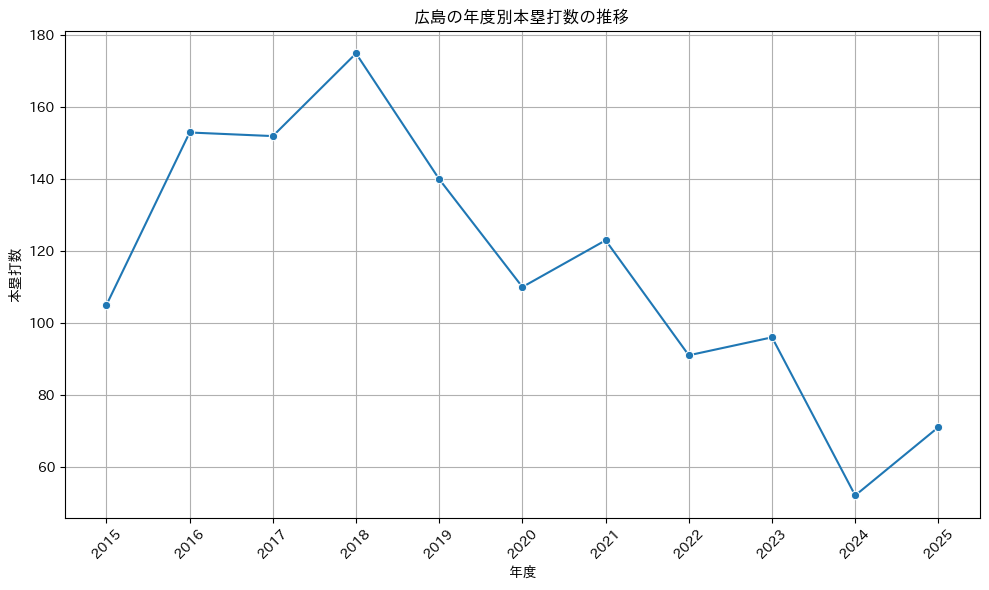

In [101]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=C_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('広島の年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(C_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

DeNAの本塁打数



In [102]:
DB_df = df[df['チーム'].isin(['DeNA'])]
DB_home_runs_by_year = DB_df[['年度', '本塁打']]
display(DB_home_runs_by_year)

,年度,本塁打
2,2015,112
9,2016,140
13,2017,134
23,2018,181
28,2019,163
30,2020,135
37,2021,136
43,2022,117
49,2023,105
54,2024,101


DeNAの年度別本塁打数の推移

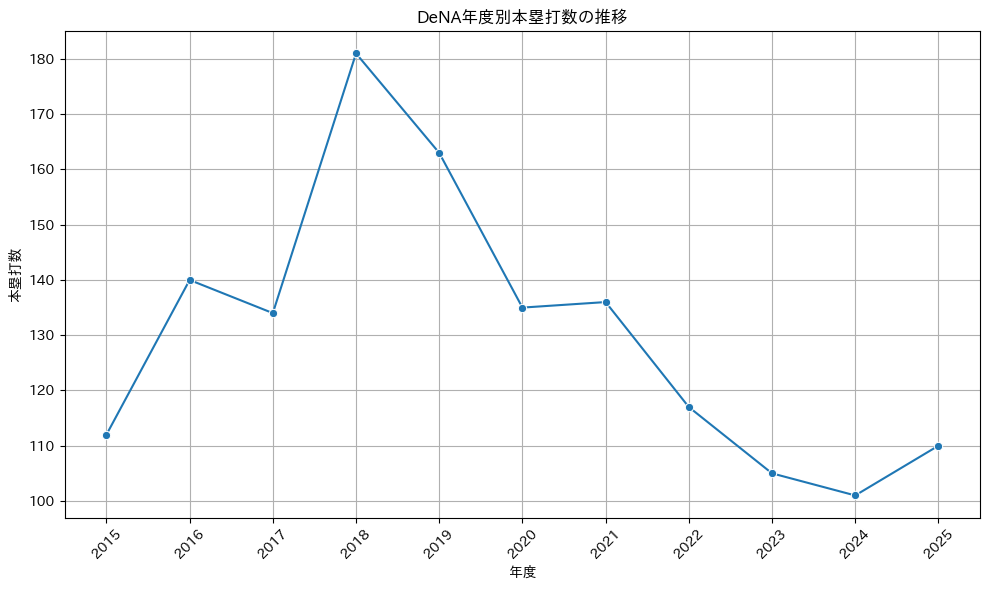

In [103]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=DB_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('DeNA年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(DB_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

セリーグ6球団の比較

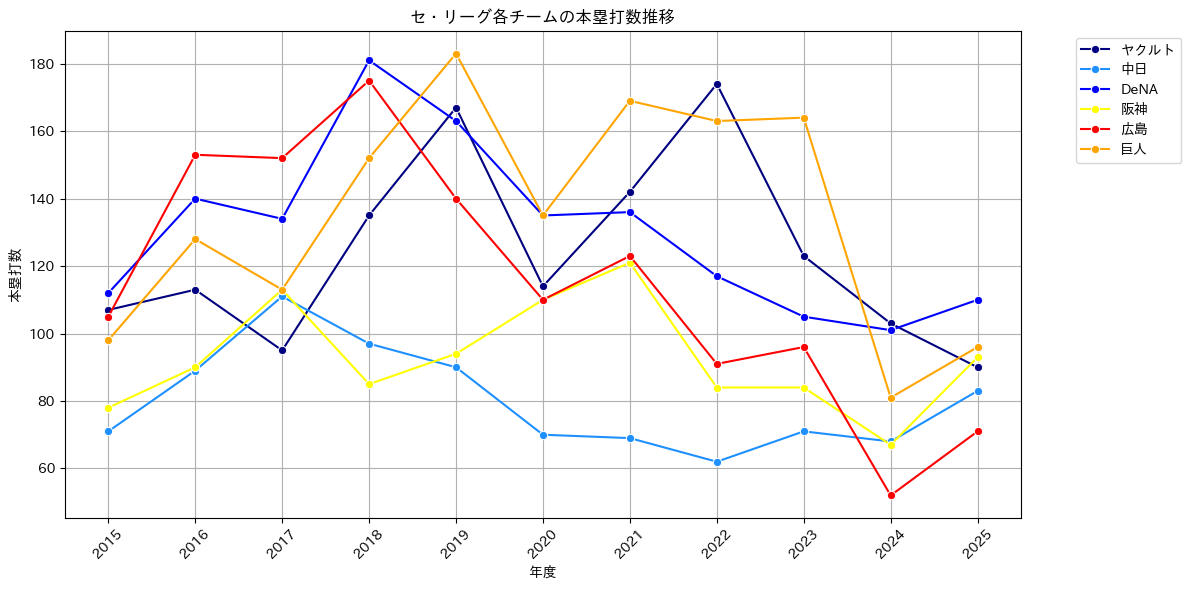

In [104]:
# セ・リーグ全チームの本塁打推移を一括表示
ce_teams = ['ヤクルト', 'DeNA', '阪神', '巨人', '広島', '中日']

# 各チームのイメージカラーを定義
team_colors = {
    '巨人': 'orange',
    '阪神': 'yellow',
    '広島': 'red',
    'DeNA': 'blue',
    '中日': 'dodgerblue',
    'ヤクルト': 'navy'
}

plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['チーム'].isin(ce_teams)], x='年度', y='本塁打', hue='チーム', marker='o', palette=team_colors)
plt.title('セ・リーグ各チームの本塁打数推移')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.xticks(df['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

ソフトバンクの本塁打数


In [105]:
H_df = df[df['チーム'].isin(['ソフトバンク'])]
H_home_runs_by_year = H_df[['年度', '本塁打']]
display(H_home_runs_by_year)

,年度,本塁打
66,2015,141
74,2016,114
79,2017,164
85,2018,202
92,2019,183
98,2020,126
103,2021,132
108,2022,108
115,2023,104
120,2024,114


ソフトバンクの年度別本塁打数の推移


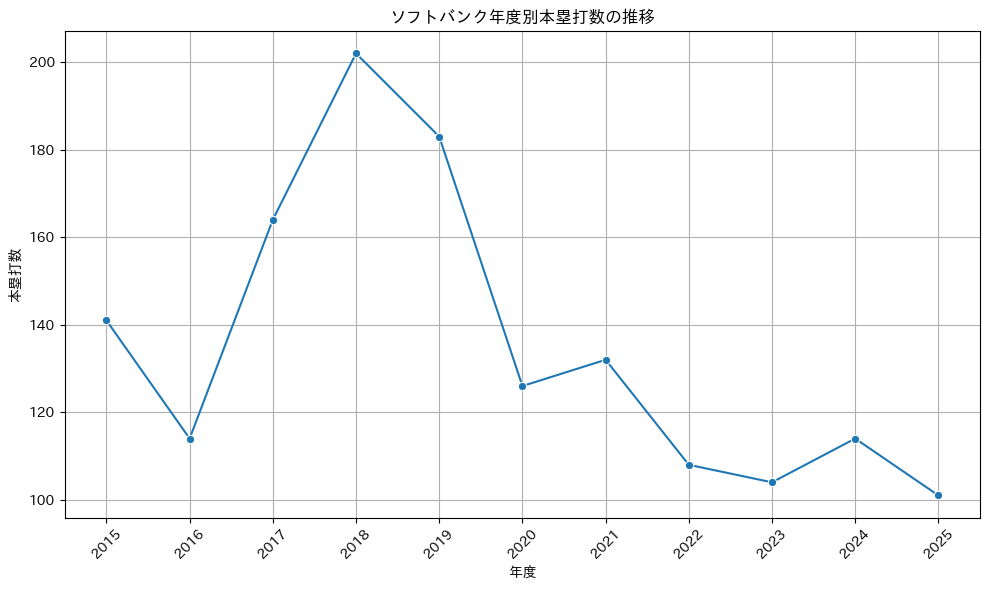

In [106]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=H_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('ソフトバンク年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(H_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

日本ハムの本塁打数

In [107]:
F_df = df[df['チーム'].isin(['日本ハム'])]
F_home_runs_by_year = F_df[['年度', '本塁打']]
display(F_home_runs_by_year)

,年度,本塁打
68,2015,106
72,2016,121
82,2017,108
86,2018,140
91,2019,93
97,2020,89
107,2021,78
111,2022,100
119,2023,100
122,2024,111


日本ハムの年度別本塁打数の推移

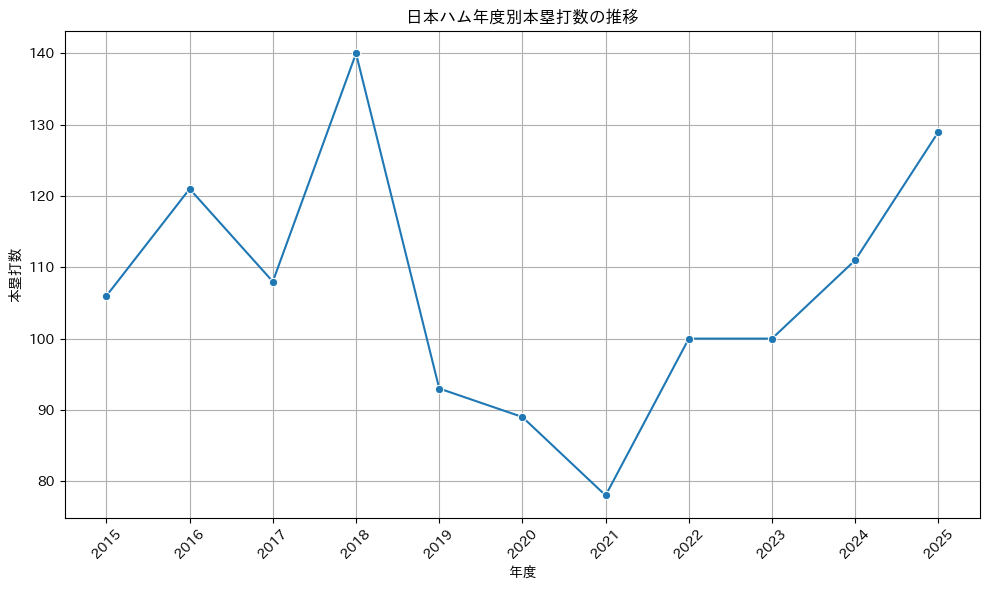

In [108]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=F_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('日本ハム年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(F_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

オリックスの本塁打数


In [109]:
B_df = df[df['チーム'].isin(['オリックス'])]
B_home_runs_by_year = B_df[['年度', '本塁打']]
display(B_home_runs_by_year)

,年度,本塁打
70,2015,94
77,2016,84
81,2017,127
88,2018,108
95,2019,102
99,2020,90
102,2021,133
109,2022,89
114,2023,109
124,2024,71


オリックスの年度別本塁打数の推移

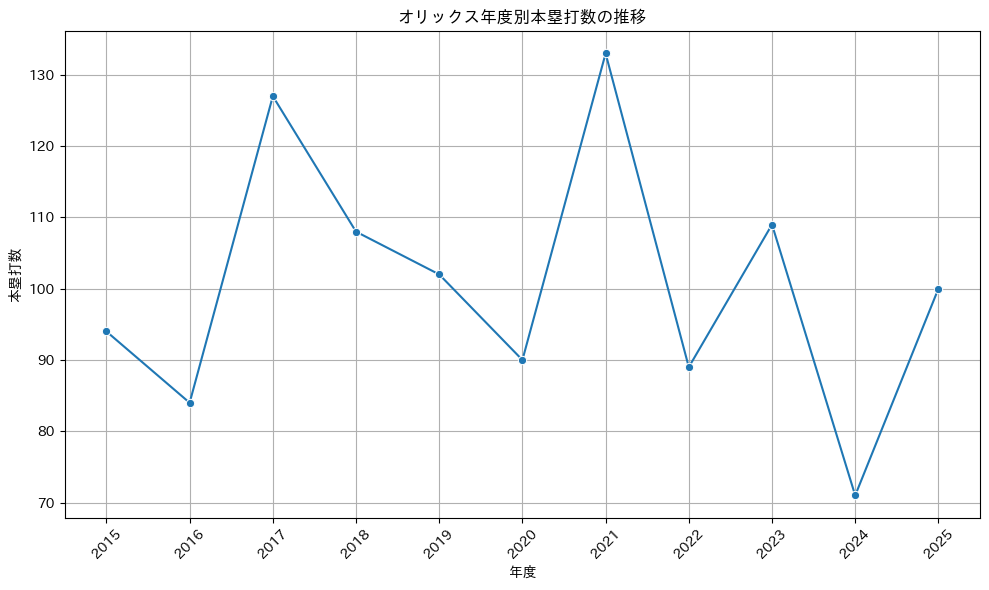

In [110]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=B_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('オリックス年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(B_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

楽天の本塁打数

In [111]:
E_df = df[df['チーム'].isin(['楽天'])]
E_home_runs_by_year = E_df[['年度', '本塁打']]
display(E_home_runs_by_year)

,年度,本塁打
71,2015,85
75,2016,101
80,2017,135
89,2018,132
93,2019,141
96,2020,112
104,2021,108
110,2022,101
116,2023,104
123,2024,72


楽天の年度別本塁打数の推移


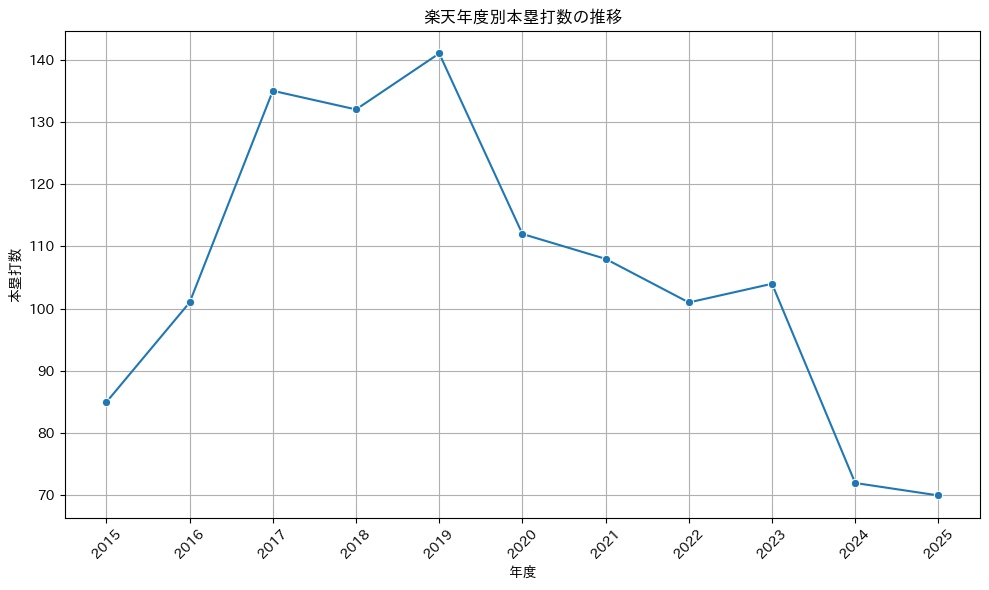

In [112]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=E_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('楽天年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(E_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

西武の本塁打数

In [113]:
L_df = df[df['チーム'].isin(['西武'])]
L_home_runs_by_year = L_df[['年度', '本塁打']]
display(L_home_runs_by_year)

,年度,本塁打
67,2015,136
73,2016,128
78,2017,153
84,2018,196
90,2019,174
100,2020,107
105,2021,112
113,2022,118
118,2023,90
125,2024,60


西武の年度別本塁打数の推移


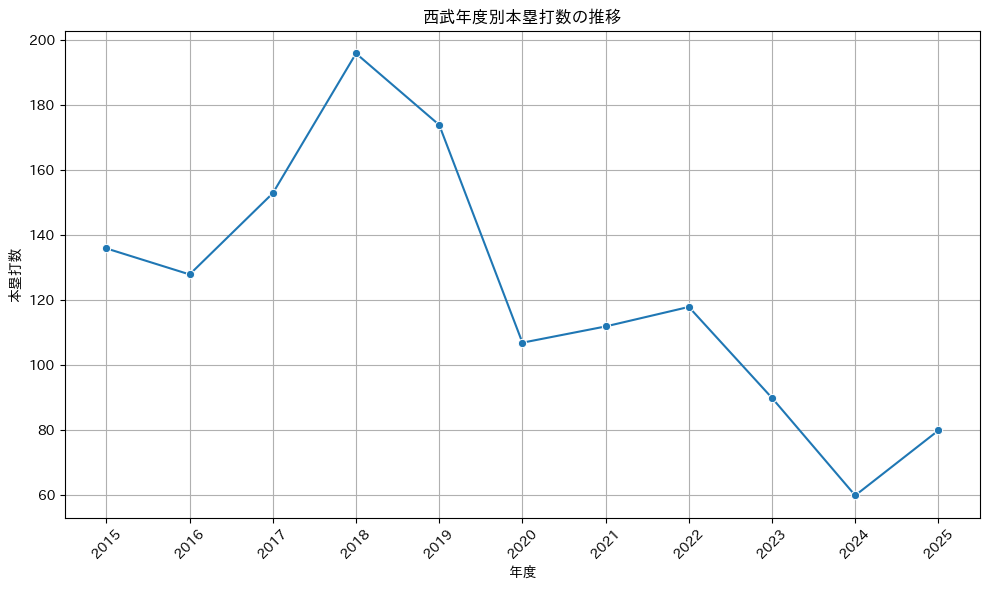

In [114]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=L_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('西武年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(L_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

ロッテの本塁打数

In [115]:
M_df = df[df['チーム'].isin(['ロッテ'])]
M_home_runs_by_year = M_df[['年度', '本塁打']]
display(M_home_runs_by_year)

,年度,本塁打
69,2015,85
76,2016,80
83,2017,95
87,2018,78
94,2019,158
101,2020,90
106,2021,126
112,2022,97
117,2023,100
121,2024,75


ロッテの年度別本塁打数の推移

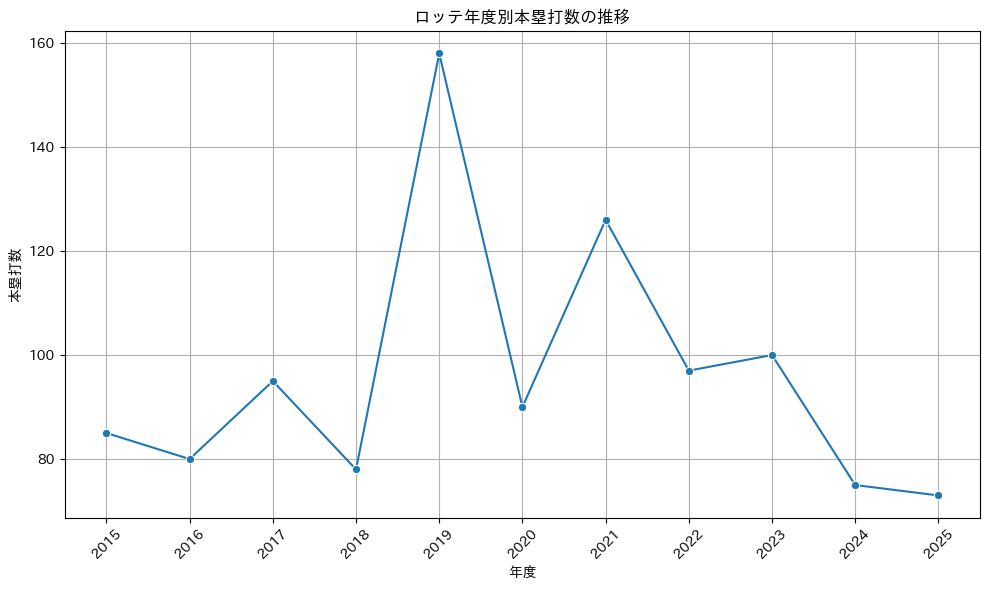

In [116]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=M_home_runs_by_year, x='年度', y='本塁打', marker='o')
plt.title('ロッテ年度別本塁打数の推移')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.grid(True)
plt.xticks(M_home_runs_by_year['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

パリーグ6球団の比較

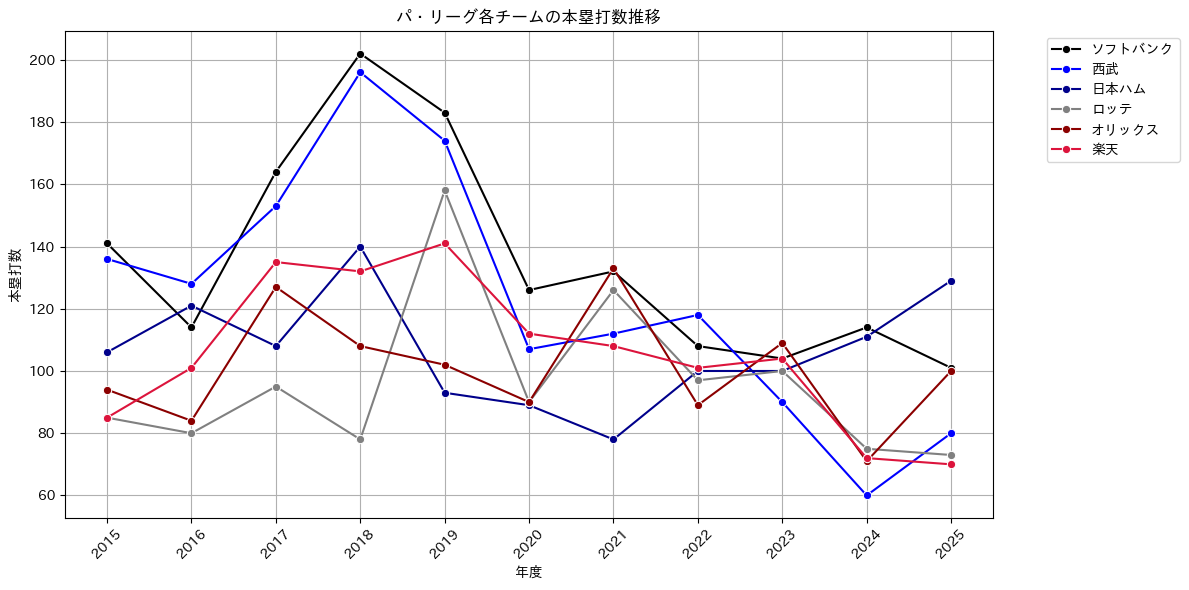

In [117]:
# パ・リーグ全チームの本塁打推移を一括表示
pl_teams = ['ソフトバンク', '日本ハム', 'オリックス', '楽天', '西武', 'ロッテ']

# 各チームのイメージカラーを定義
team_colors = {
    'ソフトバンク': 'black',
    '日本ハム': 'darkblue',
    'オリックス': 'darkred',
    '楽天': 'crimson',
    '西武': 'blue',
    'ロッテ': 'grey'
}

plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['チーム'].isin(pl_teams)], x='年度', y='本塁打', hue='チーム', marker='o', palette=team_colors)
plt.title('パ・リーグ各チームの本塁打数推移')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('年度')
plt.ylabel('本塁打数')
plt.xticks(df['年度'].unique(), rotation=45)
plt.tight_layout()
plt.show()

セリーグ6球団の2025年度の打撃成績の平均を取り平均から+-を作っているか

In [118]:
central_league_2025_df = df[(df['年度'] == 2025) & (df['リーグ'] == 'セ・リーグ')]
display(central_league_2025_df)

,年度,リーグ,チーム,打率,試合,打席,打数,得点,安打,二塁打,...,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打,長打率,出塁率
60,2025,セ・リーグ,巨人,0.250,143,5364,4799,463,1198,206,...,40,89,27,402,27,47,1087,81,0.360,0.312
61,2025,セ・リーグ,DeNA,0.247,143,5295,4772,510,1177,221,...,31,82,39,346,36,56,957,99,0.368,0.303
62,2025,セ・リーグ,広島,0.246,143,5296,4817,441,1184,211,...,40,88,22,325,29,44,1010,81,0.343,0.298
63,2025,セ・リーグ,阪神,0.245,143,5413,4770,496,1168,192,...,41,136,25,441,43,41,1090,88,0.354,0.313
64,2025,セ・リーグ,ヤクルト,0.234,143,5331,4742,443,1110,202,...,27,125,30,383,26,51,998,87,0.340,0.297
65,2025,セ・リーグ,中日,0.232,143,5245,4712,403,1092,189,...,31,131,26,338,39,38,1089,66,0.335,0.287


In [119]:
columns_to_average = ['本塁打', '打率', '得点', '出塁率', '長打率']
central_league_2025_avg = central_league_2025_df[columns_to_average].mean().to_frame().T
central_league_2025_avg.index = ['リーグ平均']
display(central_league_2025_avg)

,本塁打,打率,得点,出塁率,長打率
リーグ平均,90.5,0.242333,459.333333,0.301667,0.35


In [120]:
central_league_2025_deviations = central_league_2025_df[columns_to_average].subtract(central_league_2025_avg.iloc[0])
central_league_2025_deviations['チーム'] = central_league_2025_df['チーム']
display(central_league_2025_deviations)

,本塁打,打率,得点,出塁率,長打率,チーム
60,5.5,0.007667,3.666667,0.010333,0.010,巨人
61,19.5,0.004667,50.666667,0.001333,0.018,DeNA
62,-19.5,0.003667,-18.333333,-0.003667,-0.007,広島
63,2.5,0.002667,36.666667,0.011333,0.004,阪神
64,-0.5,-0.008333,-16.333333,-0.004667,-0.010,ヤクルト
65,-7.5,-0.010333,-56.333333,-0.014667,-0.015,中日


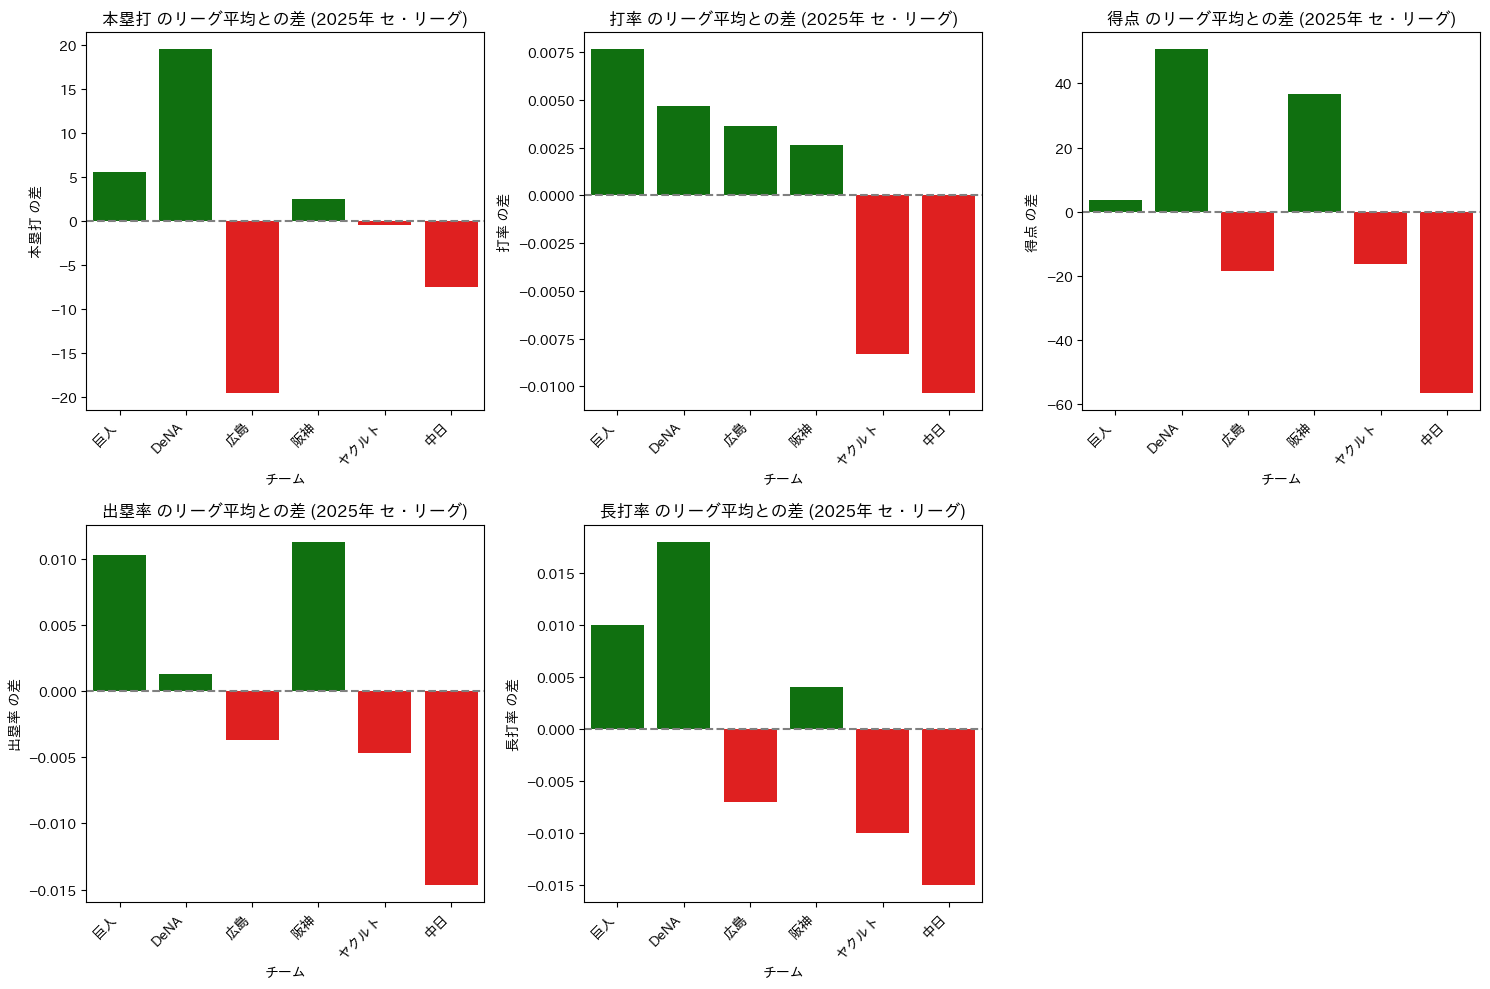

In [121]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_average):
    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    colors = ['green' if x > 0 else 'red' for x in central_league_2025_deviations[col]]
    sns.barplot(x='チーム', y=col, data=central_league_2025_deviations, hue='チーム', palette=colors, legend=False)
    plt.title(f'{col} のリーグ平均との差 (2025年 セ・リーグ)')
    plt.xlabel('チーム')
    plt.ylabel(f'{col} の差')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(0, color='grey', linestyle='--') # Add a line at zero for reference

plt.tight_layout()
plt.show()

パリーグ6球団の2025年度の打撃成績の平均を取り平均から+-を作っているか


In [122]:
pacific_league_2025_df = df[(df['年度'] == 2025) & (df['リーグ'] == 'パ・リーグ')]
display(pacific_league_2025_df)

,年度,リーグ,チーム,打率,試合,打席,打数,得点,安打,二塁打,...,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打,長打率,出塁率
126,2025,パ・リーグ,ソフトバンク,0.257,143,5399,4785,551,1229,186,...,24,95,33,436,18,50,1130,89,0.371,0.323
127,2025,パ・リーグ,オリックス,0.255,143,5453,4913,502,1252,198,...,28,66,36,384,13,54,949,94,0.364,0.314
128,2025,パ・リーグ,日本ハム,0.248,143,5396,4866,548,1209,195,...,30,57,28,399,13,46,1142,81,0.381,0.310
129,2025,パ・リーグ,楽天,0.244,143,5423,4824,446,1179,146,...,21,77,46,422,18,54,1060,101,0.329,0.310
130,2025,パ・リーグ,ロッテ,0.241,143,5304,4790,441,1153,199,...,26,79,33,337,12,65,1038,87,0.336,0.298
131,2025,パ・リーグ,西武,0.232,143,5259,4742,410,1102,170,...,42,88,34,346,16,49,925,93,0.328,0.289


In [123]:
columns_to_average = ['本塁打', '打率', '得点', '出塁率', '長打率']
pacific_league_2025_avg = pacific_league_2025_df[columns_to_average].mean().to_frame().T
pacific_league_2025_avg.index = ['リーグ平均']
display(pacific_league_2025_avg)

,本塁打,打率,得点,出塁率,長打率
リーグ平均,92.166667,0.246167,483.0,0.307333,0.3515


In [124]:
pacific_league_2025_deviations = pacific_league_2025_df[columns_to_average].subtract(pacific_league_2025_avg.iloc[0])
pacific_league_2025_deviations['チーム'] = pacific_league_2025_df['チーム']
display(pacific_league_2025_deviations)

,本塁打,打率,得点,出塁率,長打率,チーム
126,8.833333,0.010833,68.0,0.015667,0.0195,ソフトバンク
127,7.833333,0.008833,19.0,0.006667,0.0125,オリックス
128,36.833333,0.001833,65.0,0.002667,0.0295,日本ハム
129,-22.166667,-0.002167,-37.0,0.002667,-0.0225,楽天
130,-19.166667,-0.005167,-42.0,-0.009333,-0.0155,ロッテ
131,-12.166667,-0.014167,-73.0,-0.018333,-0.0235,西武


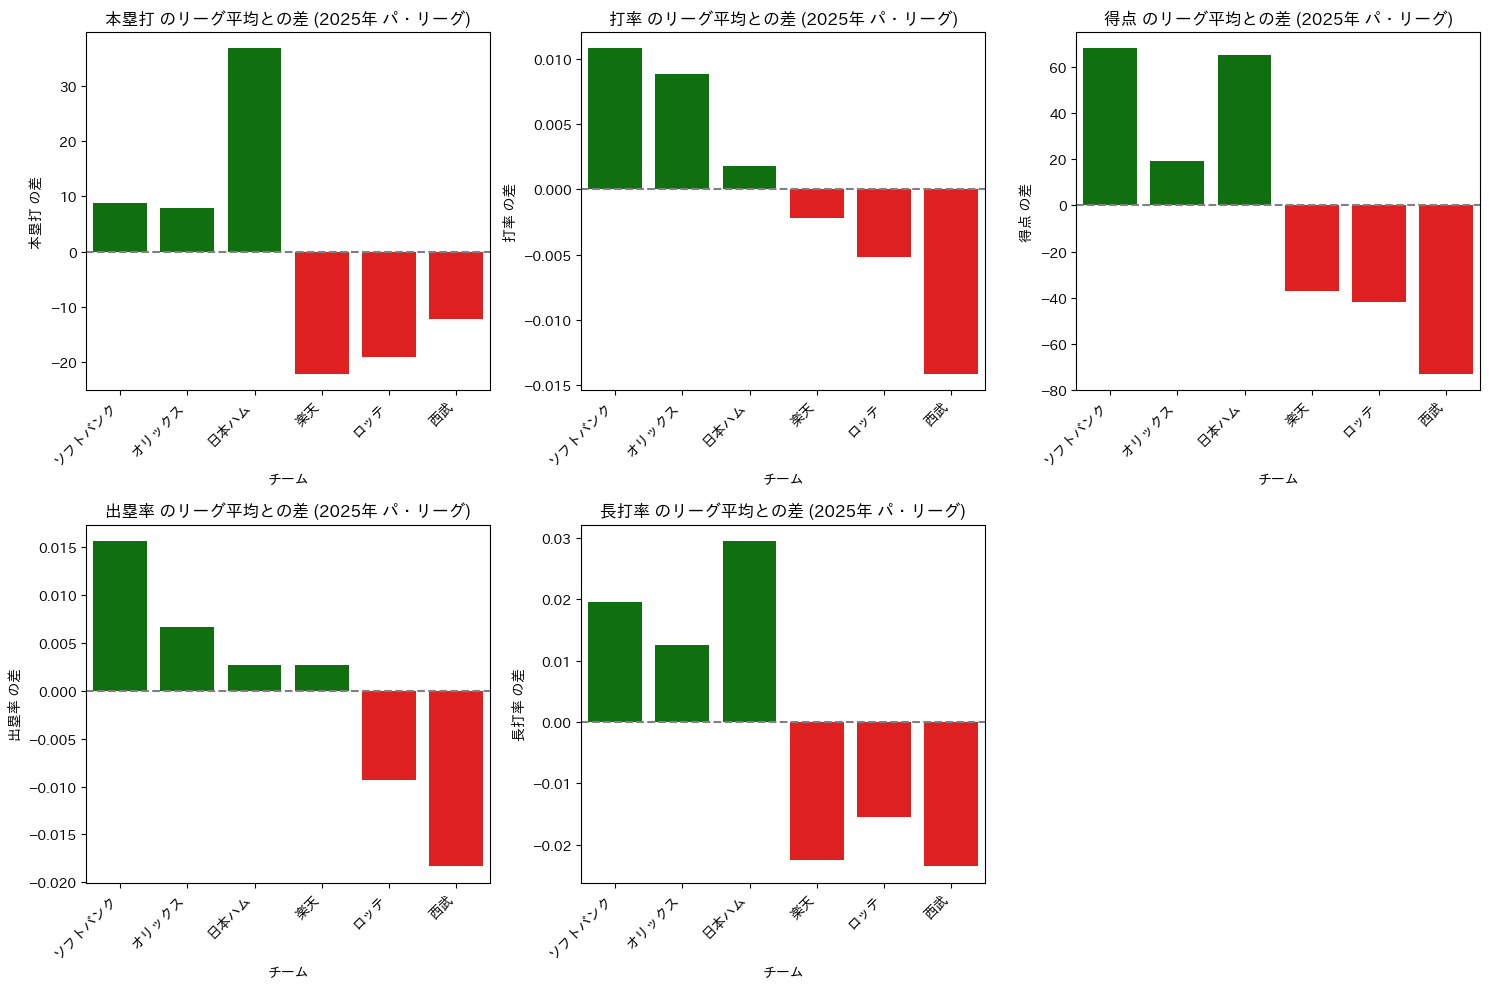

In [125]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_average):
    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    colors = ['green' if x > 0 else 'red' for x in pacific_league_2025_deviations[col]]
    sns.barplot(x='チーム', y=col, data=pacific_league_2025_deviations, hue='チーム', palette=colors, legend=False)
    plt.title(f'{col} のリーグ平均との差 (2025年 パ・リーグ)')
    plt.xlabel('チーム')
    plt.ylabel(f'{col} の差')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(0, color='grey', linestyle='--') # Add a line at zero for reference

plt.tight_layout()
plt.show()

「得点力に直結する指標の特定」と「各チームの打撃スタイルのマッピング」


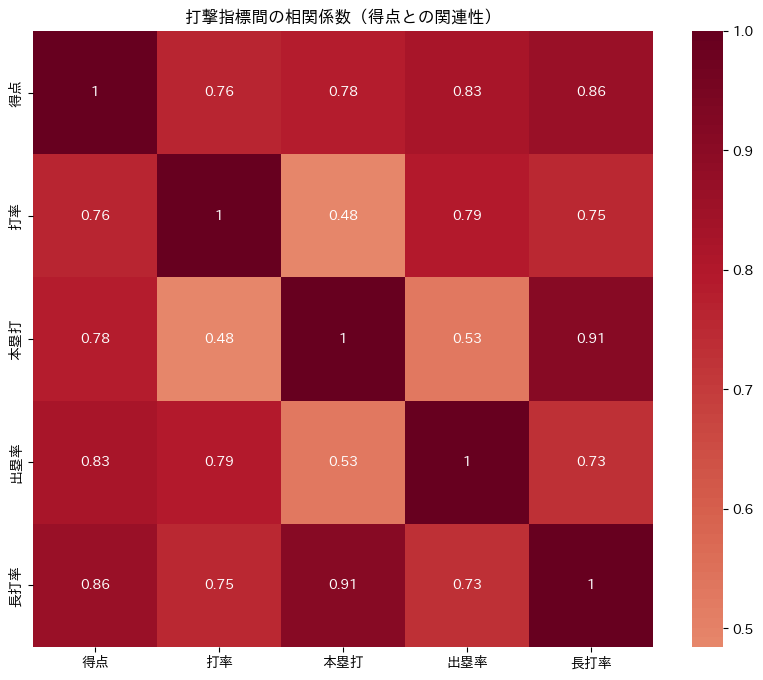

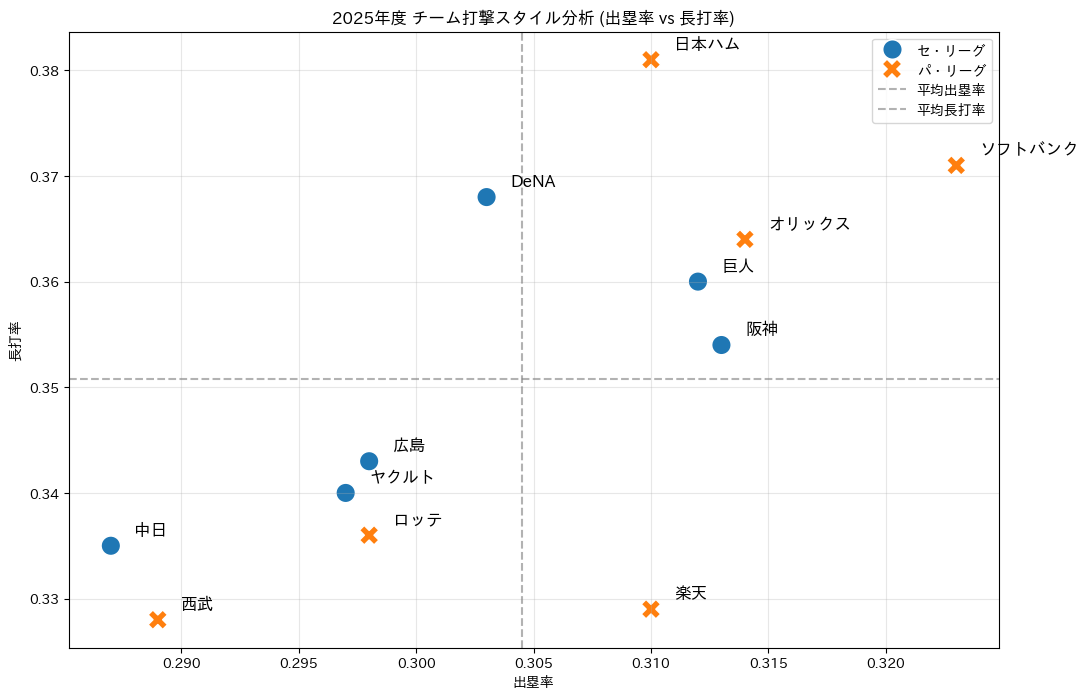

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 指標間の相関分析（どの指標が得点に効いているか）
# 数値データのみを抽出
numeric_cols = ['得点', '打率', '本塁打', '出塁率', '長打率']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('打撃指標間の相関係数（得点との関連性）')
plt.show()

# 2. 2025年度の出塁率(OBP) vs 長打率(SLG) の散布図
df_2025 = df[df['年度'] == 2025]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_2025, x='出塁率', y='長打率', hue='リーグ', style='リーグ', s=200)

# 各点にチーム名をラベルとして追加
for i in range(df_2025.shape[0]):
    plt.text(df_2025.出塁率.iloc[i]+0.001, df_2025.長打率.iloc[i]+0.001,
             df_2025.チーム.iloc[i], fontsize=12)

# リーグ平均の線を引く
plt.axvline(df_2025['出塁率'].mean(), color='gray', linestyle='--', alpha=0.6, label='平均出塁率')
plt.axhline(df_2025['長打率'].mean(), color='gray', linestyle='--', alpha=0.6, label='平均長打率')

plt.title('2025年度 チーム打撃スタイル分析 (出塁率 vs 長打率)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

2015-2025年度で各打撃項目をTOP12


In [127]:
batting_stats = ['本塁打', '打率', '得点', '出塁率', '長打率']
print("分析対象の打撃指標リスト:", batting_stats)

分析対象の打撃指標リスト: ['本塁打', '打率', '得点', '出塁率', '長打率']


In [128]:
years = range(2015, 2026)

for year in years:
    print(f"\n--- {year}年度の打撃成績トップ12 ---")
    for stat in batting_stats:
        # Current year data
        year_df = df[df['年度'] == year]

        # Sort by the current statistic in descending order and get the top 12
        top_10_teams = year_df.sort_values(by=stat, ascending=False).head(12)

        print(f"\n{year}年度 {stat} トップ12:")
        display(top_10_teams[['チーム', stat]])


--- 2015年度の打撃成績トップ12 ---

2015年度 本塁打 トップ12:


,チーム,本塁打
66,ソフトバンク,141
67,西武,136
2,DeNA,112
0,ヤクルト,107
68,日本ハム,106
4,広島,105
5,巨人,98
70,オリックス,94
69,ロッテ,85
71,楽天,85



2015年度 打率 トップ12:


,チーム,打率
66,ソフトバンク,0.267
67,西武,0.263
68,日本ハム,0.258
0,ヤクルト,0.257
69,ロッテ,0.257
1,中日,0.253
70,オリックス,0.249
2,DeNA,0.249
3,阪神,0.247
4,広島,0.246



2015年度 得点 トップ12:


,チーム,得点
66,ソフトバンク,651
67,西武,631
68,日本ハム,615
0,ヤクルト,574
69,ロッテ,561
70,オリックス,519
2,DeNA,508
4,広島,506
5,巨人,489
1,中日,473



2015年度 出塁率 トップ12:


,チーム,出塁率
66,ソフトバンク,0.340
67,西武,0.335
68,日本ハム,0.330
0,ヤクルト,0.322
70,オリックス,0.321
69,ロッテ,0.320
3,阪神,0.317
1,中日,0.313
5,巨人,0.313
4,広島,0.312



2015年度 長打率 トップ12:


,チーム,長打率
66,ソフトバンク,0.408
67,西武,0.406
68,日本ハム,0.378
0,ヤクルト,0.377
2,DeNA,0.373
4,広島,0.368
69,ロッテ,0.368
5,巨人,0.354
70,オリックス,0.354
1,中日,0.344



--- 2016年度の打撃成績トップ12 ---

2016年度 本塁打 トップ12:


,チーム,本塁打
6,広島,153
9,DeNA,140
8,巨人,128
73,西武,128
72,日本ハム,121
74,ソフトバンク,114
7,ヤクルト,113
75,楽天,101
11,阪神,90
10,中日,89



2016年度 打率 トップ12:


,チーム,打率
6,広島,0.272
72,日本ハム,0.266
73,西武,0.264
74,ソフトバンク,0.261
75,楽天,0.257
76,ロッテ,0.256
7,ヤクルト,0.256
77,オリックス,0.253
8,巨人,0.251
9,DeNA,0.249



2016年度 得点 トップ12:


,チーム,得点
6,広島,684
74,ソフトバンク,637
73,西武,619
72,日本ハム,619
7,ヤクルト,594
76,ロッテ,583
9,DeNA,572
75,楽天,544
8,巨人,519
11,阪神,506



2016年度 出塁率 トップ12:


,チーム,出塁率
6,広島,0.343
74,ソフトバンク,0.341
72,日本ハム,0.340
73,西武,0.335
7,ヤクルト,0.331
76,ロッテ,0.326
75,楽天,0.324
77,オリックス,0.317
11,阪神,0.312
8,巨人,0.310



2016年度 長打率 トップ12:


,チーム,長打率
6,広島,0.421
73,西武,0.395
74,ソフトバンク,0.386
9,DeNA,0.385
72,日本ハム,0.385
8,巨人,0.384
7,ヤクルト,0.378
75,楽天,0.368
76,ロッテ,0.363
77,オリックス,0.355



--- 2017年度の打撃成績トップ12 ---

2017年度 本塁打 トップ12:


,チーム,本塁打
79,ソフトバンク,164
78,西武,153
12,広島,152
80,楽天,135
13,DeNA,134
81,オリックス,127
15,阪神,113
14,巨人,113
16,中日,111
82,日本ハム,108



2017年度 打率 トップ12:


,チーム,打率
12,広島,0.273
78,西武,0.264
79,ソフトバンク,0.259
80,楽天,0.254
13,DeNA,0.252
81,オリックス,0.251
15,阪神,0.249
14,巨人,0.249
16,中日,0.247
82,日本ハム,0.242



2017年度 得点 トップ12:


,チーム,得点
12,広島,736
78,西武,690
79,ソフトバンク,638
13,DeNA,597
15,阪神,589
80,楽天,585
81,オリックス,539
14,巨人,536
82,日本ハム,509
16,中日,487



2017年度 出塁率 トップ12:


,チーム,出塁率
12,広島,0.345
78,西武,0.332
79,ソフトバンク,0.331
15,阪神,0.327
80,楽天,0.324
14,巨人,0.318
81,オリックス,0.316
82,日本ハム,0.313
13,DeNA,0.311
17,ヤクルト,0.306



2017年度 長打率 トップ12:


,チーム,長打率
12,広島,0.424
79,ソフトバンク,0.421
78,西武,0.420
13,DeNA,0.391
80,楽天,0.390
81,オリックス,0.380
14,巨人,0.373
15,阪神,0.371
16,中日,0.365
82,日本ハム,0.357



--- 2018年度の打撃成績トップ12 ---

2018年度 本塁打 トップ12:


,チーム,本塁打
85,ソフトバンク,202
84,西武,196
23,DeNA,181
20,広島,175
21,巨人,152
86,日本ハム,140
18,ヤクルト,135
89,楽天,132
88,オリックス,108
19,中日,97



2018年度 打率 トップ12:


,チーム,打率
84,西武,0.273
18,ヤクルト,0.266
85,ソフトバンク,0.266
19,中日,0.265
20,広島,0.262
21,巨人,0.257
22,阪神,0.253
86,日本ハム,0.251
23,DeNA,0.250
87,ロッテ,0.247



2018年度 得点 トップ12:


,チーム,得点
84,西武,792
20,広島,721
85,ソフトバンク,685
18,ヤクルト,658
21,巨人,625
19,中日,598
86,日本ハム,589
22,阪神,577
23,DeNA,572
88,オリックス,538



2018年度 出塁率 トップ12:


,チーム,出塁率
84,西武,0.352
20,広島,0.349
18,ヤクルト,0.347
22,阪神,0.330
86,日本ハム,0.329
85,ソフトバンク,0.326
21,巨人,0.325
19,中日,0.325
87,ロッテ,0.324
88,オリックス,0.308



2018年度 長打率 トップ12:


,チーム,長打率
84,西武,0.454
85,ソフトバンク,0.451
20,広島,0.431
23,DeNA,0.415
21,巨人,0.403
18,ヤクルト,0.402
86,日本ハム,0.393
19,中日,0.380
89,楽天,0.368
88,オリックス,0.365



--- 2019年度の打撃成績トップ12 ---

2019年度 本塁打 トップ12:


,チーム,本塁打
25,巨人,183
92,ソフトバンク,183
90,西武,174
29,ヤクルト,167
28,DeNA,163
94,ロッテ,158
93,楽天,141
26,広島,140
95,オリックス,102
27,阪神,94



2019年度 打率 トップ12:


,チーム,打率
90,西武,0.265
24,中日,0.263
25,巨人,0.257
26,広島,0.254
27,阪神,0.251
91,日本ハム,0.251
93,楽天,0.251
92,ソフトバンク,0.251
94,ロッテ,0.249
28,DeNA,0.246



2019年度 得点 トップ12:


,チーム,得点
90,西武,756
25,巨人,663
29,ヤクルト,656
94,ロッテ,642
93,楽天,614
28,DeNA,596
26,広島,591
92,ソフトバンク,582
24,中日,563
91,日本ハム,560



2019年度 出塁率 トップ12:


,チーム,出塁率
90,西武,0.344
25,巨人,0.335
93,楽天,0.333
94,ロッテ,0.330
29,ヤクルト,0.329
91,日本ハム,0.325
26,広島,0.324
27,阪神,0.319
24,中日,0.317
28,DeNA,0.315



2019年度 長打率 トップ12:


,チーム,長打率
90,西武,0.428
25,巨人,0.422
92,ソフトバンク,0.410
94,ロッテ,0.402
29,ヤクルト,0.398
28,DeNA,0.398
26,広島,0.392
93,楽天,0.390
24,中日,0.381
91,日本ハム,0.365



--- 2020年度の打撃成績トップ12 ---

2020年度 本塁打 トップ12:


,チーム,本塁打
30,DeNA,135
32,巨人,135
98,ソフトバンク,126
35,ヤクルト,114
96,楽天,112
31,広島,110
34,阪神,110
100,西武,107
101,ロッテ,90
99,オリックス,90



2020年度 打率 トップ12:


,チーム,打率
30,DeNA,0.266
31,広島,0.262
96,楽天,0.258
32,巨人,0.255
33,中日,0.252
97,日本ハム,0.249
98,ソフトバンク,0.249
99,オリックス,0.247
34,阪神,0.246
35,ヤクルト,0.242



2020年度 得点 トップ12:


,チーム,得点
96,楽天,557
32,巨人,532
98,ソフトバンク,531
31,広島,523
30,DeNA,516
34,阪神,494
97,日本ハム,493
100,西武,479
35,ヤクルト,468
101,ロッテ,461



2020年度 出塁率 トップ12:


,チーム,出塁率
96,楽天,0.341
31,広島,0.331
97,日本ハム,0.330
101,ロッテ,0.329
32,巨人,0.328
30,DeNA,0.324
34,阪神,0.321
35,ヤクルト,0.321
98,ソフトバンク,0.321
33,中日,0.317



2020年度 長打率 トップ12:


,チーム,長打率
30,DeNA,0.415
32,巨人,0.410
31,広島,0.402
96,楽天,0.401
98,ソフトバンク,0.401
34,阪神,0.381
35,ヤクルト,0.375
100,西武,0.374
99,オリックス,0.367
97,日本ハム,0.364



--- 2021年度の打撃成績トップ12 ---

2021年度 本塁打 トップ12:


,チーム,本塁打
40,巨人,169
38,ヤクルト,142
37,DeNA,136
102,オリックス,133
103,ソフトバンク,132
106,ロッテ,126
36,広島,123
39,阪神,121
105,西武,112
104,楽天,108



2021年度 打率 トップ12:


,チーム,打率
36,広島,0.264
37,DeNA,0.258
38,ヤクルト,0.254
39,阪神,0.247
103,ソフトバンク,0.247
102,オリックス,0.247
104,楽天,0.243
40,巨人,0.242
106,ロッテ,0.239
105,西武,0.239



2021年度 得点 トップ12:


,チーム,得点
38,ヤクルト,625
106,ロッテ,584
103,ソフトバンク,564
37,DeNA,559
36,広島,557
40,巨人,552
102,オリックス,551
39,阪神,541
104,楽天,532
105,西武,521



2021年度 出塁率 トップ12:


,チーム,出塁率
38,ヤクルト,0.333
104,楽天,0.329
36,広島,0.324
37,DeNA,0.320
106,ロッテ,0.320
103,ソフトバンク,0.314
102,オリックス,0.312
39,阪神,0.311
105,西武,0.310
40,巨人,0.310



2021年度 長打率 トップ12:


,チーム,長打率
37,DeNA,0.402
40,巨人,0.399
38,ヤクルト,0.397
36,広島,0.389
103,ソフトバンク,0.385
39,阪神,0.379
106,ロッテ,0.379
102,オリックス,0.378
105,西武,0.363
104,楽天,0.363



--- 2022年度の打撃成績トップ12 ---

2022年度 本塁打 トップ12:


,チーム,本塁打
44,ヤクルト,174
47,巨人,163
113,西武,118
43,DeNA,117
108,ソフトバンク,108
110,楽天,101
111,日本ハム,100
112,ロッテ,97
42,広島,91
109,オリックス,89



2022年度 打率 トップ12:


,チーム,打率
42,広島,0.257
108,ソフトバンク,0.255
43,DeNA,0.251
44,ヤクルト,0.250
45,中日,0.247
109,オリックス,0.246
46,阪神,0.243
110,楽天,0.243
47,巨人,0.242
111,日本ハム,0.234



2022年度 得点 トップ12:


,チーム,得点
44,ヤクルト,619
108,ソフトバンク,555
42,広島,552
47,巨人,548
110,楽天,533
112,ロッテ,501
43,DeNA,497
109,オリックス,490
46,阪神,489
113,西武,464



2022年度 出塁率 トップ12:


,チーム,出塁率
110,楽天,0.325
108,ソフトバンク,0.320
44,ヤクルト,0.318
109,オリックス,0.317
42,広島,0.309
47,巨人,0.309
43,DeNA,0.308
112,ロッテ,0.303
45,中日,0.301
46,阪神,0.301



2022年度 長打率 トップ12:


,チーム,長打率
44,ヤクルト,0.410
47,巨人,0.392
43,DeNA,0.378
108,ソフトバンク,0.377
42,広島,0.364
109,オリックス,0.361
113,西武,0.358
110,楽天,0.357
111,日本ハム,0.356
112,ロッテ,0.342



--- 2023年度の打撃成績トップ12 ---

2023年度 本塁打 トップ12:


,チーム,本塁打
48,巨人,164
52,ヤクルト,123
114,オリックス,109
49,DeNA,105
115,ソフトバンク,104
116,楽天,104
119,日本ハム,100
117,ロッテ,100
51,広島,96
118,西武,90



2023年度 打率 トップ12:


,チーム,打率
48,巨人,0.252
114,オリックス,0.250
115,ソフトバンク,0.248
49,DeNA,0.247
50,阪神,0.247
51,広島,0.246
116,楽天,0.244
52,ヤクルト,0.239
117,ロッテ,0.239
53,中日,0.234



2023年度 得点 トップ12:


,チーム,得点
50,阪神,555
115,ソフトバンク,536
52,ヤクルト,534
48,巨人,523
49,DeNA,520
116,楽天,513
114,オリックス,508
117,ロッテ,505
51,広島,493
119,日本ハム,464



2023年度 出塁率 トップ12:


,チーム,出塁率
50,阪神,0.322
116,楽天,0.321
115,ソフトバンク,0.319
117,ロッテ,0.311
114,オリックス,0.311
52,ヤクルト,0.310
48,巨人,0.308
49,DeNA,0.305
51,広島,0.304
119,日本ハム,0.297



2023年度 長打率 トップ12:


,チーム,長打率
48,巨人,0.402
49,DeNA,0.369
114,オリックス,0.369
52,ヤクルト,0.367
115,ソフトバンク,0.360
116,楽天,0.358
51,広島,0.357
117,ロッテ,0.354
50,阪神,0.352
119,日本ハム,0.344



--- 2024年度の打撃成績トップ12 ---

2024年度 本塁打 トップ12:


,チーム,本塁打
120,ソフトバンク,114
122,日本ハム,111
57,ヤクルト,103
54,DeNA,101
55,巨人,81
121,ロッテ,75
123,楽天,72
124,オリックス,71
56,中日,68
58,阪神,67



2024年度 打率 トップ12:


,チーム,打率
120,ソフトバンク,0.259
54,DeNA,0.256
121,ロッテ,0.248
55,巨人,0.247
122,日本ハム,0.245
56,中日,0.243
57,ヤクルト,0.243
58,阪神,0.242
123,楽天,0.242
59,広島,0.238



2024年度 得点 トップ12:


,チーム,得点
120,ソフトバンク,607
122,日本ハム,532
54,DeNA,522
57,ヤクルト,506
121,ロッテ,493
123,楽天,492
58,阪神,485
55,巨人,462
59,広島,415
124,オリックス,402



2024年度 出塁率 トップ12:


,チーム,出塁率
120,ソフトバンク,0.327
58,阪神,0.314
54,DeNA,0.313
121,ロッテ,0.312
57,ヤクルト,0.311
55,巨人,0.309
123,楽天,0.303
122,日本ハム,0.301
124,オリックス,0.297
56,中日,0.293



2024年度 長打率 トップ12:


,チーム,長打率
120,ソフトバンク,0.394
54,DeNA,0.375
122,日本ハム,0.367
55,巨人,0.349
57,ヤクルト,0.349
121,ロッテ,0.346
123,楽天,0.339
124,オリックス,0.331
56,中日,0.330
58,阪神,0.327



--- 2025年度の打撃成績トップ12 ---

2025年度 本塁打 トップ12:


,チーム,本塁打
128,日本ハム,129
61,DeNA,110
126,ソフトバンク,101
127,オリックス,100
60,巨人,96
63,阪神,93
64,ヤクルト,90
65,中日,83
131,西武,80
130,ロッテ,73



2025年度 打率 トップ12:


,チーム,打率
126,ソフトバンク,0.257
127,オリックス,0.255
60,巨人,0.250
128,日本ハム,0.248
61,DeNA,0.247
62,広島,0.246
63,阪神,0.245
129,楽天,0.244
130,ロッテ,0.241
64,ヤクルト,0.234



2025年度 得点 トップ12:


,チーム,得点
126,ソフトバンク,551
128,日本ハム,548
61,DeNA,510
127,オリックス,502
63,阪神,496
60,巨人,463
129,楽天,446
64,ヤクルト,443
62,広島,441
130,ロッテ,441



2025年度 出塁率 トップ12:


,チーム,出塁率
126,ソフトバンク,0.323
127,オリックス,0.314
63,阪神,0.313
60,巨人,0.312
129,楽天,0.310
128,日本ハム,0.310
61,DeNA,0.303
62,広島,0.298
130,ロッテ,0.298
64,ヤクルト,0.297



2025年度 長打率 トップ12:


,チーム,長打率
128,日本ハム,0.381
126,ソフトバンク,0.371
61,DeNA,0.368
127,オリックス,0.364
60,巨人,0.360
63,阪神,0.354
62,広島,0.343
64,ヤクルト,0.340
130,ロッテ,0.336
65,中日,0.335
